In [15]:
from __future__ import division, print_function,unicode_literals

import numpy as np
import os 

np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [16]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2, 3)]
y = iris["target"]

setosa_or_versicolor = ( y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

#SVM Classifier 
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

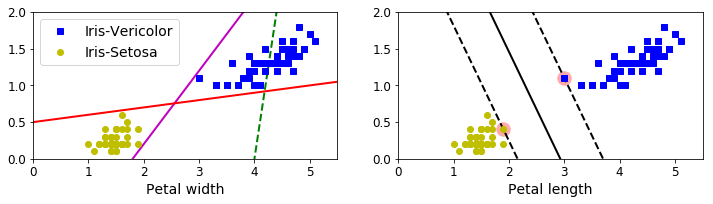

In [17]:
# Bad models 

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 -20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf,xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # x0*w0 + w1*x1 + b = 0 => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,"k-",linewidth=2)
    plt.plot(x0,gutter_up,"k--",linewidth=2)
    plt.plot(x0,gutter_down,"k--",linewidth=2)
    
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1],X[:, 1][y==1], "bs", label="Iris-Vericolor")
plt.plot(X[:,0][y==0],X[:, 1][y==0],"yo",label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.xlabel("Petal width",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:,1][y==1],"bs")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo")
plt.xlabel("Petal length",fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

[-2, 2, -2, 2]

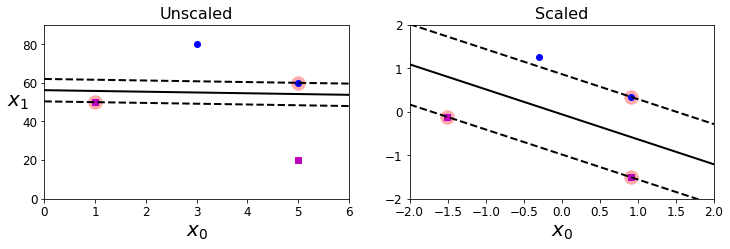

In [19]:
Xs = np.array([[1, 50],[5,20], [3,80],[5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel="linear",C=100)
svm_clf.fit(Xs,ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],"bo")
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$",fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1], X_scaled[:, 1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0], X_scaled[:, 1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$",fontsize=20)
plt.title("Scaled",fontsize=16)
plt.axis([-2, 2, -2, 2])
